In [1]:
import json
import os

current_directory = os.getcwd()

with open("main.custom_segments.json", "r", encoding="utf-8") as jsonfile:
    data = json.load(jsonfile)

for item in data:
    item["label"] = str(item["label"]).strip()


def filter_item(item):
    duration = item["end"] - item["start"]
    test1 = duration <= 30 and duration > 3
    test2 = item["state"] == "reviewed"
    test3 = len(str(item["label"]).split()) > 1
    return test1 and test2 and test3


filtered_data = [item for item in data if filter_item(item)]

count_dict = {}
for item in filtered_data:
    if item["source"] in count_dict.keys():
        count_dict[item["source"]] += 1
    else:
        count_dict[item["source"]] = 1

_ = [print(key, ":", count_dict[key]) for key in count_dict.keys()]

F-248 : 314
F-429 : 118
F-448 : 124
F-433 : 201
F-252 : 177
F-452 : 91
F-459 : 123
F-469 : 81
F-250 : 170
F-257 : 148
F-485 : 131
F-265 : 147
F-444 : 104
F-270 : 104
F-258 : 163
F-490 : 11
F-271 : 51


In [2]:
count = sum([count_dict[key] for key in count_dict.keys()])
test_count = int(count * 0.15)
val_count = int(count * 0.15)
train_count = count - (test_count + val_count)

print("Total:", count)
print("Test:", test_count)
print("Validation:", val_count)
print("Train", train_count)

Total: 2258
Test: 338
Validation: 338
Train 1582


In [3]:
sorted_audios = sorted(count_dict.keys(), key=lambda x: count_dict[x], reverse=True)

test_audios = []
curr = sorted_audios.pop()
test_recount = sum([count_dict[item] for item in test_audios])
while (test_recount + count_dict[curr]) < test_count:
    test_audios.append(curr)
    test_recount = sum([count_dict[item] for item in test_audios])
    curr = sorted_audios.pop()

val_audios = []
val_recount = sum([count_dict[item] for item in val_audios])
while (val_recount + count_dict[curr]) < val_count:
    val_audios.append(curr)
    val_recount = sum([count_dict[item] for item in val_audios])
    curr = sorted_audios.pop()

sorted_audios.append(curr)
train_audios = sorted_audios

print("Test basket", sum([count_dict[item] for item in test_audios]))
print("Val basket", sum([count_dict[item] for item in val_audios]))
print("Train basket", sum([count_dict[item] for item in train_audios]))

Test basket 234
Val basket 326
Train basket 1698


In [4]:
test_list, val_list, train_list = [], [], []
for segment in filtered_data:
    segment["word_count"] = len(str(segment["label"]).split())
    if segment["source"] in test_audios:
        test_list.append(segment)
    elif segment["source"] in val_audios:
        val_list.append(segment)
    elif segment["source"] in train_audios:
        train_list.append(segment)

In [5]:
len(train_list)

1698

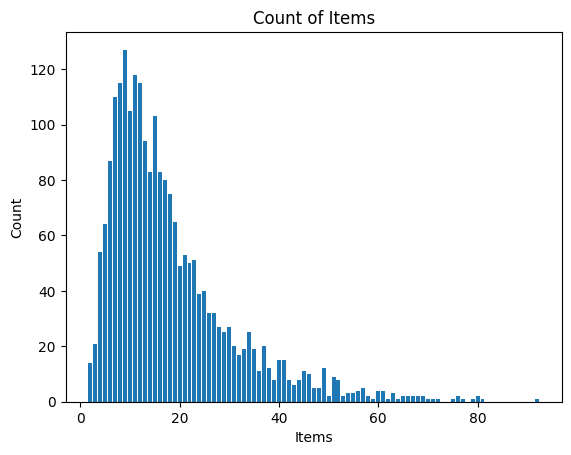

In [6]:
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
word_counts = [segment["word_count"] for segment in filtered_data]

# Count the occurrences of each item in the data
item_counts = {item: word_counts.count(item) for item in set(word_counts)}

# Convert the dictionary to two separate lists for items and their counts
items = list(item_counts.keys())
counts = list(item_counts.values())

# Plot the count of items using Matplotlib
plt.bar(items, counts)

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Count of Items')

# Show the plot
plt.show()

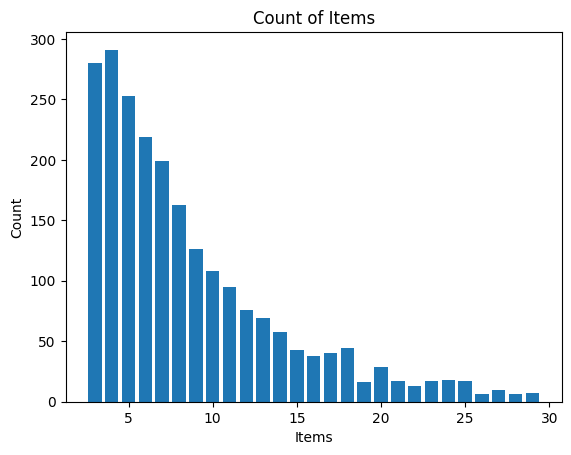

In [7]:
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
durations = [int(segment["end"] - segment["start"]) for segment in filtered_data]

# Count the occurrences of each item in the data
item_counts = {item: durations.count(item) for item in set(durations)}

# Convert the dictionary to two separate lists for items and their counts
items = list(item_counts.keys())
counts = list(item_counts.values())

# Plot the count of items using Matplotlib
plt.bar(items, counts)

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Count of Items')

# Show the plot
plt.show()